# Import libraries

In [1]:
import os
import sys
print("Python version: {}". format(sys.version))
print("Python environment: {}".format(sys.executable))

import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile
#from openpyxl import load_workbook
print("pandas version: {}". format(pd.__version__))

import plotly_express as px
import matplotlib #collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
print("matplotlib version: {}". format(matplotlib.__version__))
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
print("seaborn version: {}". format(sns.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))
import scipy as sp #collection of functions for scientific computing and advance mathematics
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
from IPython.display import display
pd.options.display.max_columns = None
print("IPython version: {}". format(IPython.__version__)) 

import datetime
from datetime import datetime
from dateutil.parser import parse
from time import time

# to make this notebook's output identical at every run
np.random.seed(42)

Python version: 3.7.10 (default, Feb 26 2021, 18:47:35) 
[GCC 7.3.0]
Python environment: /home/ncondo/anaconda3/envs/home-value-predictor/bin/python
pandas version: 1.2.3
matplotlib version: 3.3.4
seaborn version: 0.11.1
NumPy version: 1.20.1
SciPy version: 1.6.1
IPython version: 7.21.0


In [2]:
import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor # import RandomForestRegressor
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.ensemble  import GradientBoostingRegressor
from sklearn.linear_model import Lasso

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.metrics import r2_score, make_scorer, mean_squared_error
print("scikit-learn libraries imported successfully")

# Other ML algorithms
from lightgbm import LGBMRegressor
print("lightgbm imported")
import xgboost as xgb
print("xgboost imported")
# from mlxtend.regressor import StackingCVRegressor, StackingRegressor
# print("StackingRegressor imported")

scikit-learn version: 0.24.1
scikit-learn libraries imported successfully
lightgbm imported
xgboost imported


# Import data

In [3]:
# importing the supplied dataset and storing it in a dataframe
training = pd.read_csv('train.csv')
# making copies of original datasets for rest of this kernel
df_train = training.copy()
print(df_train.shape)

(1460, 81)


In [4]:
target = df_train['SalePrice']  #target variable
df_train = df_train.drop('SalePrice', axis=1) 

print("Training: {}, Target: {}, Test: {}".format(df_train.shape, target.shape, df_test.shape))

NameError: name 'df_test' is not defined

# Exploratory Data Analysis

## Quick EDA

In [5]:
df_train_exp = df_train.copy() #make a copy of the training dataset for EDA purposes
print(df_train_exp.shape) 

(1460, 80)


In [6]:
df_train_exp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [7]:
# break down columns by data type
print("{} Numerical columns, {} Categorial columns".format(
    list(df_train_exp.select_dtypes(include=[np.number]).shape)[1],
    list(df_train_exp.select_dtypes(include = ['object']).shape)[1]))

37 Numerical columns, 43 Categorial columns


In [8]:
df_train_exp.columns.to_series().groupby(df_train_exp.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'Garag

In [9]:
#list of columns with missing values
print("{} columns have missing values:".format(
    len(df_train_exp.columns[df_train_exp.isna().any()].tolist())))
df_train_exp.columns[df_train_exp.isna().any()].tolist()

19 columns have missing values:


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
df_train_exp.describe() # let's have a look at variable types in our dataframe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


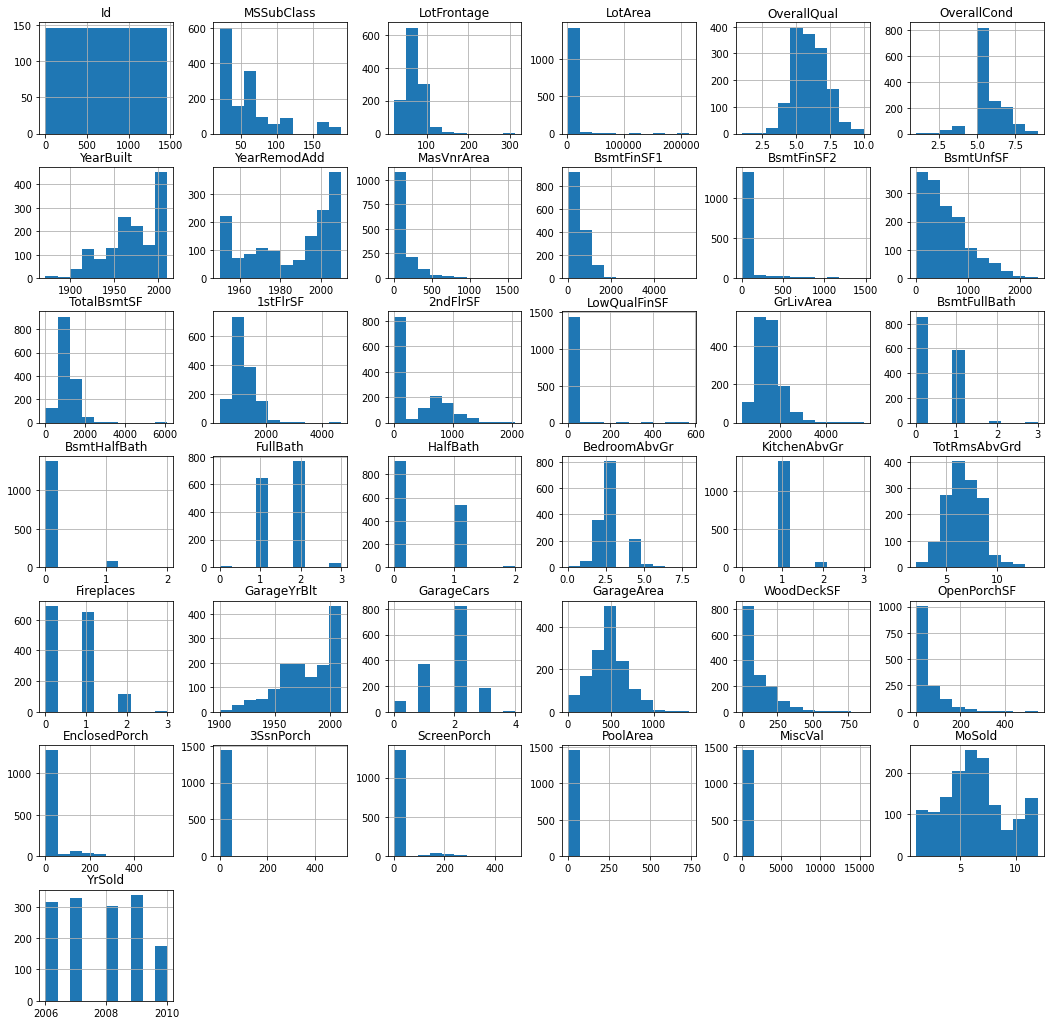

In [11]:
df_train_exp.hist(figsize=(18,18))
plt.show()

In [12]:
# Testing for normal distribution hypothesis in numerical features
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
numerical_features = [f for f in df_train_exp.columns if df_train_exp.dtypes[f] != 'object']
normal = pd.DataFrame(df_train_exp[numerical_features])
normal = normal.apply(test_normality)
print(not normal.any())

False


## Correlation Map

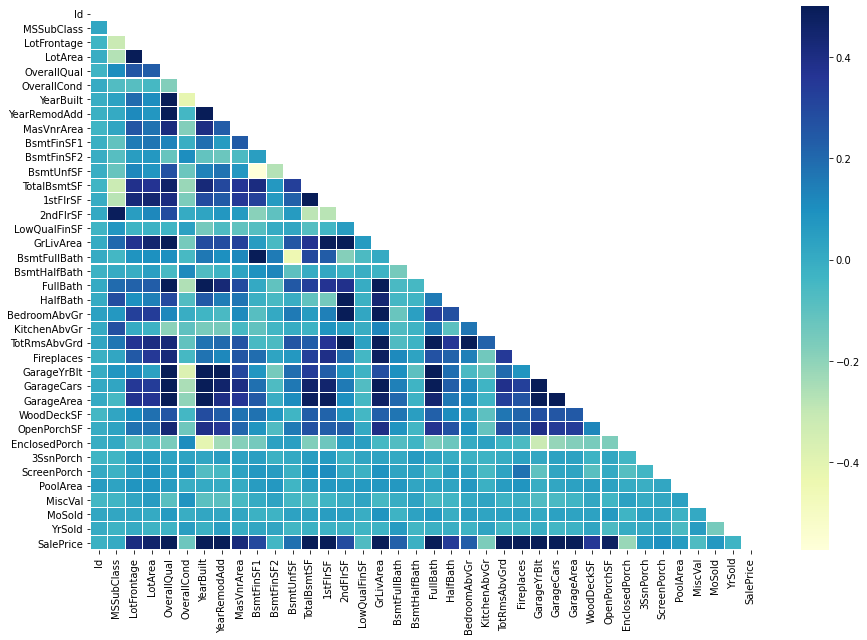

In [13]:
# Calculate correlations
corr = training.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            #annot=True, 
            fmt='.2f',
            linewidths=.2, cmap="YlGnBu");

In [14]:
# Find correlations with the target and sort
correlations = training.corr(method='spearman')['SalePrice'].sort_values(ascending=False)
correlations_abs = correlations.abs()
print('\nTop 10 correlations (absolute):\n', correlations_abs.head(11))



Top 10 correlations (absolute):
 SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
Name: SalePrice, dtype: float64


## Target Feature: SalePrice

In [15]:
target_exp = target.copy() #make copy for exploratory purposes

In [16]:
# let's see if there are any missing values (i.e. NA)
print("There are {} NA values in 'SalePrice'".format(target_exp.isnull().values.sum()))

There are 0 NA values in 'SalePrice'


/home/ncondo/anaconda3/envs/home-value-predictor/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.882876
Normal dist. ($\mu=$ 180921.20 and $\sigma=$ 79415.29 )


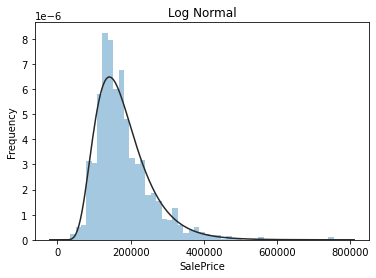

In [17]:
y = target_exp
plt.figure(1); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)
plt.ylabel('Frequency')
print("Skewness: %f" % target_exp.skew())
# get mean and standard deviation
(mu, sigma) = norm.fit(target_exp)
print('Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma))

In [18]:
# let's get some stats on the 'SalePrice' variable
print("Statistics for the supplied house prices training dataset:\n")
print("Minimum price: ${:,.2f}".format(np.min(target_exp)))
print("Maximum price: ${:,.2f}".format(np.max(target_exp)))
print("Mean price: ${:,.2f}".format(np.mean(target_exp)))
print("Median price ${:,.2f}".format(np.median(target_exp)))
print("Standard deviation of prices: ${:,.2f}".format(np.std(target_exp)))

Statistics for the supplied house prices training dataset:

Minimum price: $34,900.00
Maximum price: $755,000.00
Mean price: $180,921.20
Median price $163,000.00
Standard deviation of prices: $79,415.29


IQR value: 84025.0
# of outliers: 61


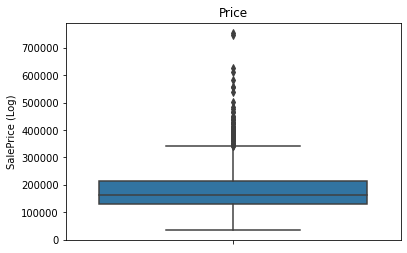

In [19]:
#  To get a visual of the outliers, let's plot a box plot.
sns.boxplot(y = target)
plt.ylabel('SalePrice (Log)')
plt.title('Price');

# count number of outliers after transformation is applied
Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)
IQR = Q3 - Q1
print("IQR value: {}\n# of outliers: {}".format(
    IQR,
    ((target < (Q1 - 1.5 * IQR)) | (target > (Q3 + 1.5 * IQR))).sum()))

# Data Preparation

## Log Transformation: Target Feature

/home/ncondo/anaconda3/envs/home-value-predictor/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.121347


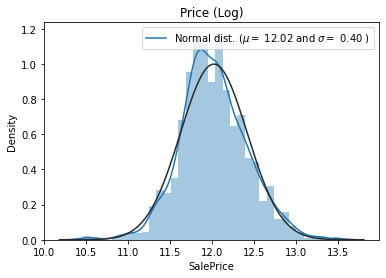

In [20]:
#applying log transformation to the Target Variable
target_tr = np.log1p(target)

# let's plot a histogram with the fitted parameters used by the function
sns.distplot(target_tr , fit=norm);
(mu, sigma) = norm.fit(target_tr)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Price (Log)');
print("Skewness: %f" % target_tr.skew())

IQR value: 0.49863092538878107
# of outliers: 28


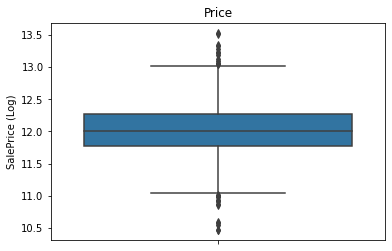

In [21]:
#  To get a visual of the outliers, let's plot a box plot.
sns.boxplot(y = target_tr)
plt.ylabel('SalePrice (Log)')
plt.title('Price');

# count number of outliers after transformation is applied
Q1 = target_tr.quantile(0.25)
Q3 = target_tr.quantile(0.75)
IQR = Q3 - Q1
print("IQR value: {}\n# of outliers: {}".format(
    IQR,
    ((target_tr < (Q1 - 1.5 * IQR)) | (target_tr > (Q3 + 1.5 * IQR))).sum()))

## Drop redundant columns

In [22]:
df_train.drop(['Id'], axis=1, inplace=True)

## Convert data type

In [23]:
numeric_features = list(df_train.select_dtypes(
        include=[np.number]).columns.values)
categ_features = list(df_train.select_dtypes(
    include=['object']).columns.values)

In [24]:
numeric_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [25]:
categ_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
for col in numeric_features:
    df_train[col] = df_train[col].astype(float)

## Missing Values

In [27]:
perc_na = (df_train.isnull().sum()/len(df_train))*100
ratio_na = perc_na.sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Values Ratio' :ratio_na})
print(missing_data.shape)
missing_data.head(20)

(79, 1)


,Missing Values Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageQual,5.547945
GarageCond,5.547945


In [28]:
# replacing NaNs in categorical features with "None"
df_train[categ_features] = df_train[categ_features].apply(lambda x: x.fillna("None"), axis=0)

In [29]:
# imputing four numerical features with zero
for col in ("LotFrontage", 'GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col].fillna(0.0, inplace=True)

In [30]:
# imputing other numerical features with median or mean
impute_method = "median"

if impute_method == "median": # replacing NaNs in numerical features with the median
    df_train[numeric_features] = df_train[numeric_features].apply(
        lambda x: x.fillna(x.median()), axis=0)
    print("Missing values imputed with median.")

elif impute_method == "mean": # replacing NaNs in numerical features with the mean
    df_train[numeric_features] = df_train[numeric_features].apply(
        lambda x: x.fillna(x.mean()), axis=0)
    print("Missing values imputed with mean.")

Missing values imputed with median.


## Feature Engineering

In [31]:
print("create combination of features.")
df_train['YrBltAndRemod']=df_train['YearBuilt']+df_train['YearRemodAdd']
df_train['TotalSF']=df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

df_train['Total_sqr_footage'] = (df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] +
                                 df_train['1stFlrSF'] + df_train['2ndFlrSF'])

df_train['Total_Bathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                               df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))

df_train['Total_porch_sf'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                              df_train['EnclosedPorch'] + df_train['ScreenPorch'] + 
                             df_train['WoodDeckSF'])

create combination of features.


In [32]:
print("create boolean features.")
df_train['haspool'] = df_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['has2ndfloor'] = df_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasgarage'] = df_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasbsmt'] = df_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasfireplace'] = df_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

create boolean features.


In [33]:
print("Transformed numerical features that should be considered as strings.")
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)
df_train['YrBltAndRemod'] = df_train['YrBltAndRemod'].astype(str)

Transformed numerical features that should be considered as strings.


In [34]:
numeric_features = list(df_train.select_dtypes(include=[np.number]).columns.values)
categ_features = list(df_train.select_dtypes(include=['object']).columns.values)

In [35]:
numeric_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'TotalSF',
 'Total_sqr_footage',
 'Total_Bathrooms',
 'Total_porch_sf',
 'haspool',
 'has2ndfloor',
 'hasgarage',
 'hasbsmt',
 'hasfireplace']

In [36]:
categ_features

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'YrBltAndRemod']

In [37]:
# Transform numerical columns with skewness factor > 0.5
# This is optional
print("Transformed numerical columns with high skewness factor.")
skew_features = df_train[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
for i in skew_index:
    df_train[i] = boxcox1p(df_train[i], boxcox_normmax(df_train[i]+1))

Transformed numerical columns with high skewness factor.


/home/ncondo/anaconda3/envs/home-value-predictor/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ncondo/anaconda3/envs/home-value-predictor/lib/python3.7/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [38]:
# Label Encoding
df_train = pd.get_dummies(df_train)

In [39]:
df_train.shape

(1460, 505)

In [40]:
# scale features
feature_scaling = "RobustScaler"

if feature_scaling == 'MinMaxScaler':
    scaler = MinMaxScaler(feature_range=(0, 1))
    for col in numeric_features:
        df_train[[col]] = scaler.fit_transform(df_train[[col]])
    print("Performed feature Scaling with MinMaxScaler.")

elif feature_scaling == 'StandardScaler':
    scaler = StandardScaler()
    for col in numeric_features:
        df_train[[col]] = scaler.fit_transform(df_train[[col]])
    print("Performed feature Scaling with StandardScaler.")

elif feature_scaling == "RobustScaler":
    scaler = RobustScaler()
    for col in numeric_features:
        df_train[[col]] = scaler.fit_transform(df_train[[col]])
    print("Performed feature Scaling with RobustScaler.")

Performed feature Scaling with RobustScaler.


## Final df validation

In [41]:
# let's check that we no longer have any missing values
perc_na = (df_train.isnull().sum()/len(df_train))*100
ratio_na = perc_na.sort_values(ascending=False)
missing_data = pd.DataFrame({'missing_ratio' :ratio_na})
missing_data = missing_data.drop(missing_data[missing_data.missing_ratio == 0].index)
missing_data.head(5)

,missing_ratio


# Machine Learning Models

## training and testing data split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_train,
                                                    target_tr,
                                                    test_size=0.2,
                                                    random_state=42)

In [43]:
print("Training Data Shape: {}".format(df_train.shape))
print("X_train Shape: {}".format(X_train.shape))
print("X_test Shape: {}".format(X_test.shape))

Training Data Shape: (1460, 505)
X_train Shape: (1168, 505)
X_test Shape: (292, 505)


## Baseline results

In [44]:
models = []
models.append(('Ridge Regression', Ridge(alpha=1.0)))
models.append(('ElasticNet', ElasticNet()))
models.append(('Random Forest', RandomForestRegressor(
    n_estimators=100, random_state=7)))
models.append(('Lasso', Lasso(random_state=42)))
models.append(('XGBoost Regressor', xgb.XGBRegressor(objective='reg:squarederror', 
                                                     random_state=42)))
models.append(('Gradient Boosting Regressor', GradientBoostingRegressor()))
models.append(('LGBM Regressor',LGBMRegressor(objective='regression')))
models.append(('SVR',SVR()))

# set table to table to populate with performance results
rmse_results = []
names = []
col = ['Algorithm', 'RMSE Mean', 'RMSE SD']
df_results = pd.DataFrame(columns=col)

# evaluate each model using cross-validation
kfold = model_selection.KFold(n_splits=5, shuffle = True, random_state=7)
i = 0
for name, model in models:
    # -mse scoring
    cv_mse_results = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    # calculate and append rmse results
    cv_rmse_results = np.sqrt(-cv_mse_results)
    rmse_results.append(cv_rmse_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_rmse_results.mean(), 4),
                         round(cv_rmse_results.std(), 4)]
    i += 1
df_results.sort_values(by=['RMSE Mean'], ascending=True).reset_index(drop=True)

,Algorithm,RMSE Mean,RMSE SD
0,Gradient Boosting Regressor,0.1312,0.0067
1,LGBM Regressor,0.1329,0.0090
2,SVR,0.1362,0.0167
3,Random Forest,0.1435,0.0094
4,Ridge Regression,0.1441,0.0207
5,XGBoost Regressor,0.1451,0.0102
6,ElasticNet,0.3668,0.0114
7,Lasso,0.3765,0.0140


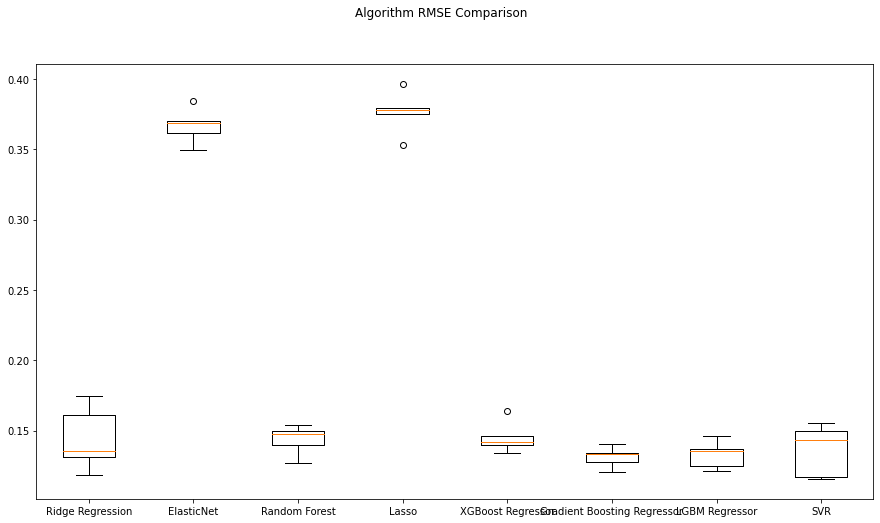

In [45]:
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Algorithm RMSE Comparison')
ax = fig.add_subplot(111)
plt.boxplot(rmse_results)
ax.set_xticklabels(names)
plt.show();

## Fine-Tuning ML Hyper-Parameters

### XGBoost

In [46]:
xgb_regressor = xgb.XGBRegressor(random_state=42)

In [47]:
parameters_xgb = {'n_estimators':range(10, 200, 10), 
             'learning_rate':[0.05,0.060,0.070], 
             'max_depth':[3,5,7],
             'min_child_weight':[1,1.5,2]}
grid_obj_xgb = RandomizedSearchCV(xgb_regressor, 
                                 parameters_xgb,
                                 scoring = 'r2', 
                                 cv = 5,
                                 n_jobs = -1,
                                 n_iter = 100,
                                 random_state= 99)
grid_fit_xgb = grid_obj_xgb.fit(X_train, y_train)
xgb_opt = grid_fit_xgb.best_estimator_

print("best params: " + str(grid_fit_xgb.best_params_))
print('best score:', grid_fit_xgb.best_score_)

best params: {'n_estimators': 190, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.07}
best score: 0.891492162188983


In [48]:
# r2 on testing data
r2_score(y_test, xgb_opt.predict(X_test)) 

0.8974246448323183

### Random Forest Regressor

In [49]:
rf_regressor = RandomForestRegressor(random_state=42)

parameters = {'n_estimators':range(10, 200, 10), 
              'min_samples_leaf':range(5, 40, 5), 
              'max_depth':range(3, 5, 1)}
grid_obj_rf = RandomizedSearchCV(rf_regressor, 
                                 parameters,
                                 scoring = 'r2', 
                                 cv = 5,
                                 n_jobs = -1,
                                 n_iter = 100,
                                 random_state= 99)
grid_fit_rf = grid_obj_rf.fit(X_train, y_train)
rf_opt = grid_fit_rf.best_estimator_

print("best params: " + str(grid_fit_rf.best_params_))
print('best score:', grid_fit_rf.best_score_)

best params: {'n_estimators': 110, 'min_samples_leaf': 5, 'max_depth': 4}
best score: 0.8272266897489636


In [50]:
# r2 on testing data
r2_score(y_test, rf_opt.predict(X_test)) 

0.8494647179586422

## Feature importance

### XGBoost

In [51]:
best_parameters_xgb = {'n_estimators': 190, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.07}
xgb_reg = xgb.XGBRegressor(**best_parameters_xgb)

In [52]:
xgb_model = xgb_reg.fit(df_train, target_tr)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

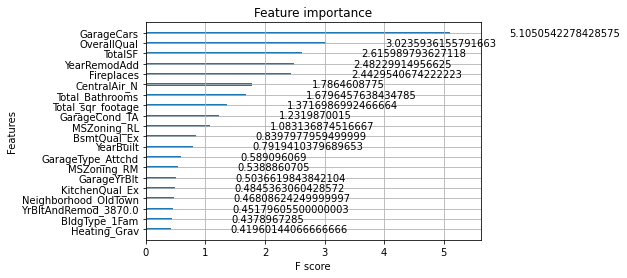

In [53]:
xgb.plot_importance(xgb_model,  max_num_features=20 , importance_type='gain')

### Random Forest Regressor

In [54]:
best_parameters_rf = {'n_estimators': 110, 'min_samples_leaf': 5, 'max_depth': 4}

In [55]:
rf_regressor = RandomForestRegressor(**best_parameters_rf)

In [56]:
rf_model = rf_regressor.fit(df_train, target_tr)

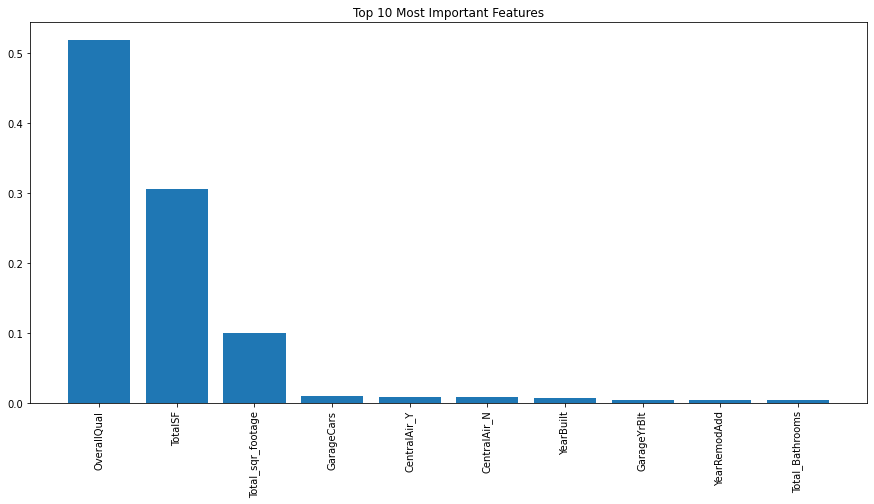

In [57]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] 
names = [df_train.columns[i] for i in indices] 
plt.figure(figsize=(15, 7)) 
plt.title("Top 10 Most Important Features") 
plt.bar(range(10), importances[indices][:10]) 
plt.xticks(range(10), names[:10], rotation=90) 
plt.show() 

### Save Models

In [62]:
xgb_model.save_model('xgb_model.json')

In [59]:
from joblib import dump, load

In [60]:
dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']